In [15]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import healpy as hp
import curvedsky as cs
sys.path.append('../')

In [2]:
%load_ext autoreload
%autoreload 2
from simulation import SimExperimentFG
from filtering import Filtering
from quest import Reconstruction

### SIMULATION

In [3]:
sim = SimExperimentFG.from_ini('LB_FG2.ini')

DATABASE INFO: File - /global/u2/l/lonappan/workspace/LBlens/Data/surveys.pkl
SIMULATION INFO: CMB Realisation - /project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps/CMB/
SIMULATION INFO: Foreground - /global/cscratch1/sd/lonappan/S4BIRD/FG
SIMULATION INFO: Foreground Model - s1d1
SIMULATION INFO: Foreground included - True
SIMULATION INFO: Number of simulations - 500
SIMULATION INFO: Frequency range - 0.0 GHz - 500.0 GHz
SIMULATION INFO: NSIDE - 512
SIMULATION INFO: Output folder - /global/cscratch1/sd/lonappan/S4BIRD/DELL_noisefix/s1d1


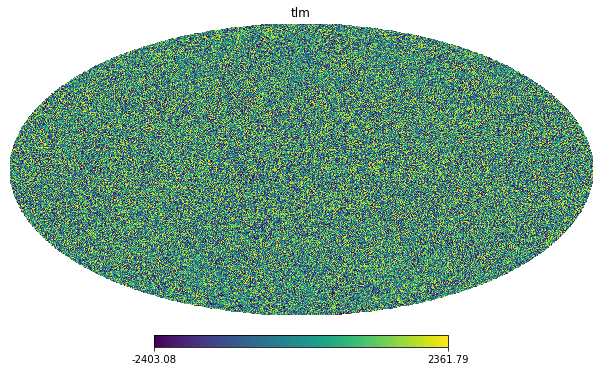

In [30]:
tlm = sim.get_cleaned_cmb(0)[1]
hp.mollview(hp.alm2map(tlm,sim.dnside),title='tlm',norm='hist')

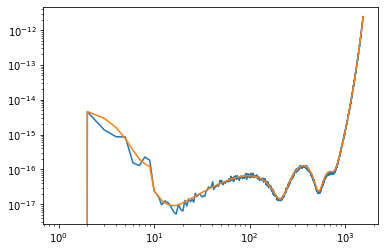

In [31]:
plt.loglog(hp.alm2cl(tlm)/sim.Tcmb**2)
plt.loglog(sim.cl_len[1,:]+ne)


In [32]:
nt,ne,nb = sim.noise_spectra(500)

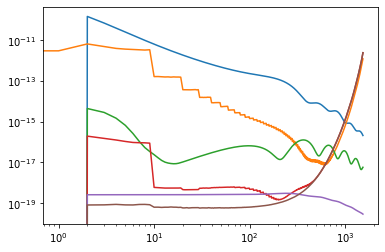

In [33]:
plt.loglog(sim.cl_len[0,:])
plt.loglog(nt)
plt.loglog(sim.cl_len[1,:])
plt.loglog(ne)
plt.loglog(sim.cl_len[2,:])
plt.loglog(nb)

### FILTERING

In [3]:
filt = Filtering.from_ini('LB_FG0.ini')

DATABASE INFO: File - /global/u2/l/lonappan/workspace/LBlens/Data/surveys.pkl
SIMULATION INFO: CMB Realisation - /project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps/CMB/
SIMULATION INFO: Foreground - /global/cscratch1/sd/lonappan/S4BIRD/FG
SIMULATION INFO: Foreground Model - s0d0
SIMULATION INFO: Foreground included - False
SIMULATION INFO: Number of simulations - 500
SIMULATION INFO: Frequency range - 0.0 GHz - 500.0 GHz
SIMULATION INFO: NSIDE - 512
SIMULATION INFO: Output folder - /global/cscratch1/sd/lonappan/S4BIRD/DELL_noisefix/noFG
FILTERING INFO: Outfolder - /global/cscratch1/sd/lonappan/S4BIRD/DELL_noisefix/noFG/Filtered
FILTERING INFO: Mask path - /project/projectdirs/litebird/simulations/maps/lensing_project_paper/Masks/LB_Nside2048_fsky_0p8_binary.fits
FILTERING INFO: fsky - 0.7990690867106119
FILTERING INFO: Beam - 15.0 arcmin


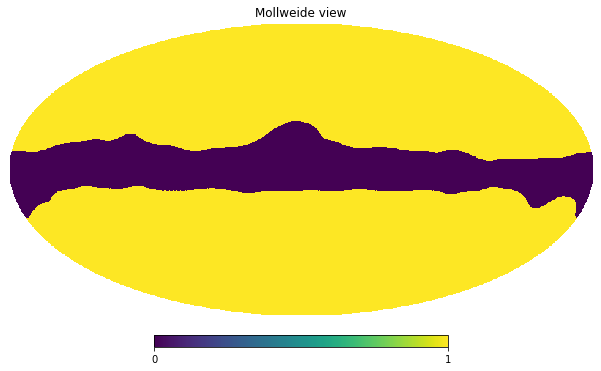

In [35]:
hp.mollview(filt.mask)

In [36]:
filt.fsky

0.7990690867106119

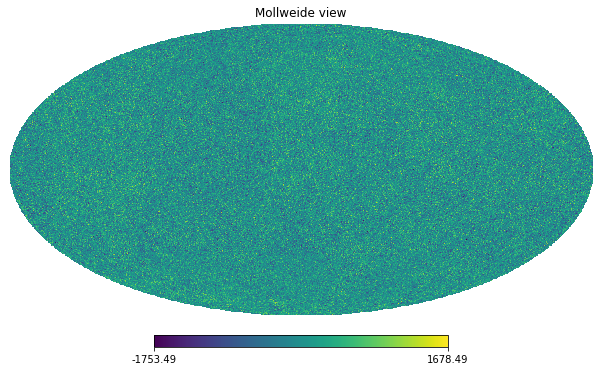

In [37]:
hp.mollview(filt.TQU_to_filter(0)[0])

/tmp/ipykernel_51991/488374186.py:3: RuntimeWarning: divide by zero encountered in true_divide
  plt.loglog(1/filt.cl_len[2,:])


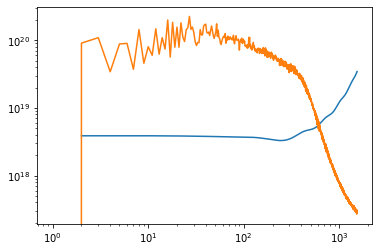

In [38]:
E,B = filt.cinv_EB(0)
clb = cs.utils.alm2cl(filt.lmax,B)
plt.loglog(1/filt.cl_len[2,:])
plt.loglog(clb)

### RECONSTRUCTION

In [16]:
rec = Reconstruction.from_ini('LB_FG2.ini')

DATABASE INFO: File - /global/u2/l/lonappan/workspace/LBlens/Data/surveys.pkl
SIMULATION INFO: CMB Realisation - /project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps/CMB/
SIMULATION INFO: Foreground - /global/cscratch1/sd/lonappan/S4BIRD/FG
SIMULATION INFO: Foreground Model - s1d1
SIMULATION INFO: Foreground included - True
SIMULATION INFO: Number of simulations - 500
SIMULATION INFO: Frequency range - 0.0 GHz - 500.0 GHz
SIMULATION INFO: NSIDE - 512
SIMULATION INFO: Output folder - /global/cscratch1/sd/lonappan/S4BIRD/DELL_noisefix/s1d1
FILTERING INFO: Outfolder - /global/cscratch1/sd/lonappan/S4BIRD/DELL_noisefix/s1d1/Filtered
FILTERING INFO: Mask path - /project/projectdirs/litebird/simulations/maps/lensing_project_paper/Masks/LB_Nside2048_fsky_0p8_binary.fits
FILTERING INFO: fsky - 0.7990690867106119
FILTERING INFO: Beam - 15.0 arcmin
QUEST INFO: Maximum L - 1024
QUEST INFO: Minimum CMB multipole - 190
QUEST INFO: Maximum CMB multipole - 600
Q

In [29]:
rec.get_phi(367)

array([[ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       [ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00-0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       [-3.14901228e-04+0.00000000e+00j, -1.47568297e-04-3.50956169e-04j,
         4.42056801e-05-7.30873745e-05j, ...,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       ...,
       [-7.88081016e-10-1.06756840e-22j,  3.98688987e-09-1.95518298e-08j,
        -1.75102785e-08+6.86818636e-09j, ...,
        -1.48054998e-11+7.33466569e-11j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       [-1.11680853e-08+3.22222566e-22j,  6.

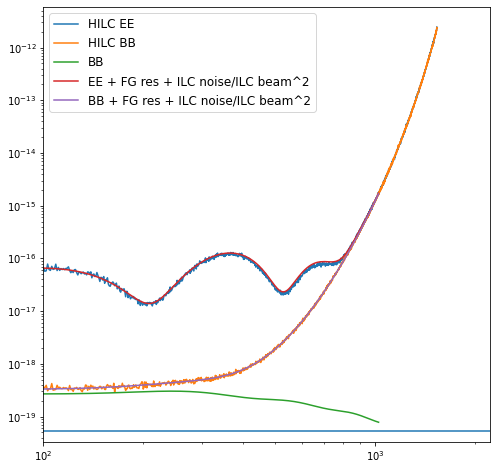

In [9]:
rec.test_obs_for_norm()

100


/tmp/ipykernel_22125/2089321912.py:2: RuntimeWarning: invalid value encountered in true_divide
  plt.loglog(rec.MCN0()/rec.response_mean()**2 *rec.Lfac)
/tmp/ipykernel_22125/2089321912.py:3: RuntimeWarning: invalid value encountered in true_divide
  plt.loglog(rec.mean_field_cl()/rec.response_mean()**2 *rec.Lfac)
/tmp/ipykernel_22125/2089321912.py:4: RuntimeWarning: invalid value encountered in true_divide
  plt.loglog(rec.N1/rec.response_mean()**2 *rec.Lfac)


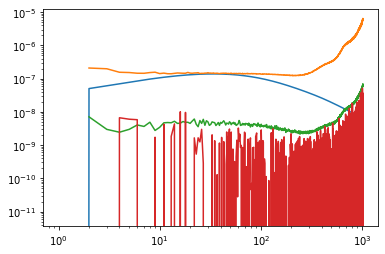

In [34]:
plt.loglog(rec.cl_pp*rec.Lfac)
plt.loglog(rec.MCN0()/rec.response_mean()**2 *rec.Lfac)
plt.loglog(rec.mean_field_cl()/rec.response_mean()**2 *rec.Lfac)
plt.loglog(rec.N1/rec.response_mean()**2 *rec.Lfac)

In [36]:
rec.SNR_phi()

43.355781701521174

/global/u2/l/lonappan/workspace/LBlens/Notebooks/../quest.py:243: RuntimeWarning: invalid value encountered in true_divide
  fl = self.cl_pp/(self.cl_pp+ nhl )


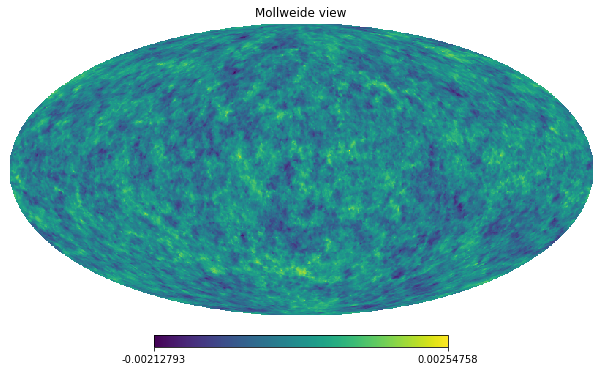

In [37]:
hp.mollview(rec.deflection_map(0))

In [38]:
stat = rec.get_qcl_wR_stat(100)

qcl stat:   0%|          | 0/100 [00:00<?, ?simulation/s]/global/u2/l/lonappan/workspace/LBlens/Notebooks/../quest.py:395: RuntimeWarning: invalid value encountered in true_divide
  return self.get_qcl(idx,n1)/self.response_mean()**2
qcl stat: 100%|██████████| 100/100 [00:29<00:00,  3.35simulation/s]


<ErrorbarContainer object of 3 artists>

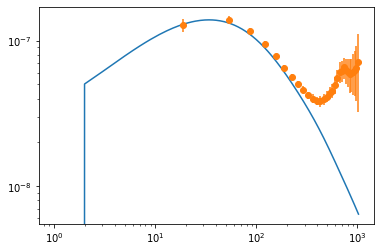

In [40]:
plt.loglog(rec.cl_pp*rec.Lfac)
plt.errorbar(rec.B,stat.mean(axis=0),stat.std(axis=0),fmt='o')

In [23]:
import pickle as pl

In [24]:
fname = '/global/cscratch1/sd/lonappan/S4BIRD/DELL_noisefix/s1d1/Reconstruction_190_600/plm/phi_fsky_0.80_0002.pkl'

In [25]:
pl.load(open(fname,'rb'))

array([[ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       [ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       [-1.18602204e-04+0.00000000e+00j,  1.02522469e-04-1.23766187e-04j,
        -7.46976064e-05-2.03317380e-04j, ...,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       ...,
       [-2.65174951e-08-6.47367158e-22j, -1.89940340e-09+1.19930345e-08j,
         1.36945222e-08+8.22452370e-09j, ...,
        -1.29058530e-11+1.50154809e-11j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       [ 4.13431619e-10-3.18197964e-22j,  1.